<a href="https://colab.research.google.com/github/Abhinayy27/ML-Models/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
path = '/content/drive/MyDrive/ML/Default_Fin.csv'
df = pd.read_csv(path)

In [ ]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [ ]:
df.drop(columns = 'Index', axis =1, inplace = True)

In [ ]:
df.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [ ]:
df.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


<Axes: xlabel='Defaulted?', ylabel='count'>

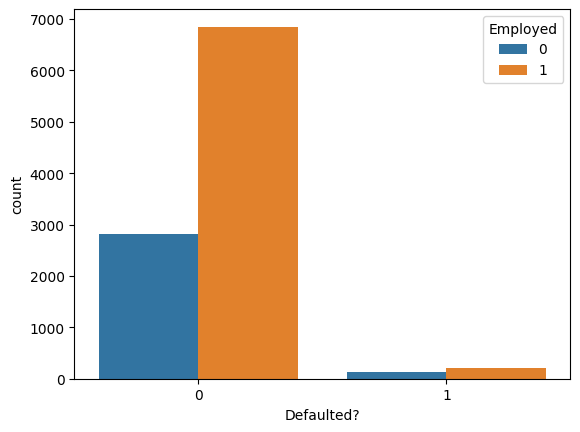

In [ ]:
sns.countplot(data = df, x='Defaulted?' , hue = 'Employed')

<Axes: >

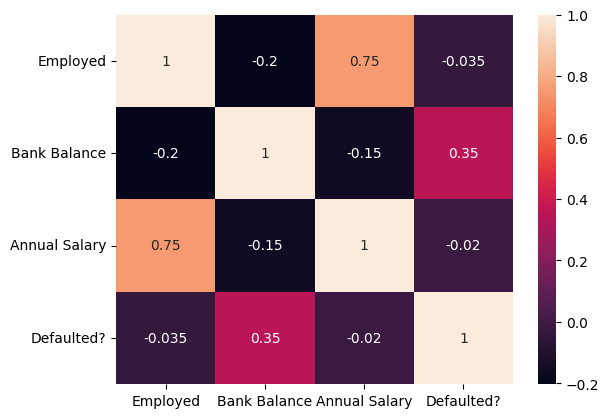

In [ ]:
sns.heatmap(df[['Employed','Bank Balance', 'Annual Salary', 'Defaulted?']].corr(),annot = True)

<Axes: xlabel='Bank Balance', ylabel='Annual Salary'>

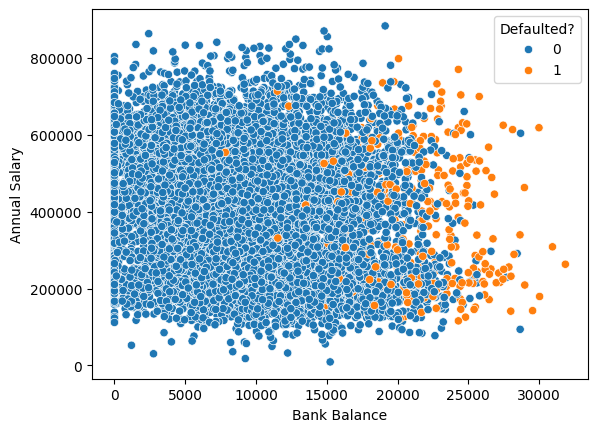

In [ ]:
sns.scatterplot(data=df, y='Annual Salary', x= 'Bank Balance', hue= 'Defaulted?')

In [ ]:
df_default = df[df['Defaulted?']==1]
df_default.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,333.000000,333.000000,333.000000,333.0
mean,0.618619,20973.858378,385069.762162,1.0
std,0.486457,4095.198311,165650.649999,0.0
min,0.000000,7828.800000,115965.480000,1.0
25%,0.000000,18139.320000,228330.120000,1.0
50%,1.000000,21469.080000,378184.080000,1.0
75%,1.000000,23866.440000,516807.960000,1.0
max,1.000000,31851.840000,797597.520000,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()

In [ ]:
x = df.drop('Defaulted?',axis = 1)
y = df['Defaulted?']

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=52)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()

In [ ]:
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       0.00      0.00      0.00        58

    accuracy                           0.97      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.94      0.97      0.96      2000

